In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()


In [3]:
# First look in to the data size
useducation_df.shape

(1492, 25)

In [4]:
useducation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

**Tasks**
1. Consider the two variables: *TOTAL_REVENUE* and *TOTAL_EXPENDITURE*. Do these variables have outlier values?
2. If you detect outliers in the *TOTAL_REVENUE* and *TOTAL_EXPENDITURE* variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.
3. Create another variable by subtracting the original *TOTAL_EXPENDITURE* from *TOTAL_REVENUE* (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.
4. Now create another variable by subtracting the *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. This time, use the outlier eliminated versions of *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. In this newly created variable, can you find any outliers? If so, eliminate them.
5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?
6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

In [5]:
# zero revenue in "STATE_REVENUE" is missing data
useducation_df=useducation_df.replace(0, np.nan)
# Replace 'VI', 'U.S._VIRGIN_ISLANDS', as 'VIRGIN_ISLAND'
useducation_df=useducation_df.replace({'VI':'VIRGIN_ISLANDS', 'U.S._VIRGIN_ISLANDS':'VIRGIN_ISLANDS', \
                                       'AS': 'AMERICAN_SAMOA', 'BI':'BUREAU_OF_INDIAN_AFFAIRS', \
                                       'BUREAU_OF_INDIAN_EDUCATIO':'BUREAU_OF_INDIAN_AFFAIRS', \
                                       'BUREAU_OF_INDIAN_EDUCATION': 'BUREAU_OF_INDIAN_AFFAIRS', \
                                       'BIE':'BUREAU_OF_INDIAN_AFFAIRS', \
                                       'DD': 'DEPARTMENT_OF_DEFENSE', \
                                       'DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY':'DEPARTMENT_OF_DEFENSE', \
                                       '^DOD.*$':'DEPARTMENT_OF_DEFENSE', \
                                       'GU':'GUAM', 'NORTHERN_MARIANAS':'NORTHERN_MARIANA_ISLANDS', \
                                       'PR':'PUERTO_RICO', 'COMMONWEALTH_OF_MARIANAS':'MARIANAS'})

useducation_df.loc[useducation_df['STATE'].str.contains('DOD'),'STATE']='DEPARTMENT_OF_DEFENSE'


In [6]:
# show replications
display(useducation_df[useducation_df.PRIMARY_KEY.duplicated(keep='first')])

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
841,2008_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2008,58191.0,1224312.0,85568.0,NaN,1138744.0,1224785.0,520090.0,...,3292.0,2936.0,2092.0,26249.0,10315.0,36676.0,NaN,NaN,NaN,NaN
880,2008_VIRGINIA,VIRGINIA,2008,1230857.0,14768120.0,897627.0,5957786.0,7912707.0,15236306.0,8003167.0,...,4666.0,3863.0,2535.0,36807.0,12837.0,51345.0,NaN,NaN,NaN,NaN
882,2008_VIRGINIA,VIRGINIA,2008,1230857.0,14768120.0,897627.0,5957786.0,7912707.0,15236306.0,8003167.0,...,2548.0,1485.0,484.0,19226.0,2758.0,24554.0,NaN,NaN,NaN,NaN
896,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2009,44331.0,801008.0,75856.0,NaN,725152.0,805362.0,330698.0,...,3423.0,2860.0,2188.0,26762.0,9970.0,36823.0,219.260141,253.595187,201.984638,252.631381
949,2010_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2010,43866.0,1195934.0,80585.0,NaN,1115349.0,1290048.0,526469.0,...,3397.0,2992.0,2203.0,27264.0,9977.0,NaN,NaN,NaN,NaN,NaN


In [7]:
# drop replications
useducation_df.drop_duplicates(subset='PRIMARY_KEY', inplace= True)

In [8]:
column_list = ['ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE', \
               'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE', \
               'CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G', 'GRADES_12_G', \
               'GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', \
               'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

useducation3_df=useducation_df.copy()
years = useducation3_df.YEAR.unique()



for column in column_list:
    for year in years:
        useducation3_df.loc[useducation3_df.YEAR==year, column].fillna( \
            useducation3_df[useducation3_df.YEAR==year][column].mean(), inplace=True)

In [9]:
display(useducation3_df)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,NaN,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


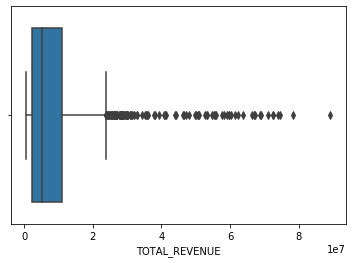

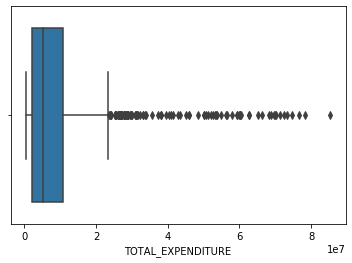

In [10]:
useducation5_df=useducation3_df.copy()
useducation5_df.dropna(axis=0, subset=['TOTAL_REVENUE','TOTAL_EXPENDITURE'], inplace=True)

sns.boxplot(useducation5_df['TOTAL_REVENUE'])
plt.show()
sns.boxplot(useducation5_df['TOTAL_EXPENDITURE'])
plt.show()

In [11]:
# Use z-score to find outliers
from scipy.stats import zscore

z_scores = zscore(useducation5_df["TOTAL_REVENUE"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers in TOTAL_REVENUE is: {}\n".format(len((np.where(z_scores > threshold)[0]))))

z_scores = zscore(useducation5_df["TOTAL_EXPENDITURE"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is in TOTAL_EXPENDITURE: {}\n".format(len((np.where(z_scores > threshold)[0]))))


The score threshold is: 1
The indices of the outliers:
(array([   4,   32,   56,   85,  108,  137,  150,  161,  190,  213,  241,
        252,  264,  292,  304,  316,  344,  355,  367,  395,  406,  419,
        448,  459,  471,  480,  500,  511,  523,  551,  563,  575,  603,
        614,  626,  631,  635,  652,  654,  660,  666,  678,  683,  687,
        704,  706,  712,  717,  729,  735,  739,  756,  758,  761,  764,
        769,  782,  787,  791,  809,  811,  814,  817,  822,  834,  839,
        843,  860,  862,  865,  868,  873,  886,  891,  895,  912,  914,
        917,  920,  925,  937,  942,  946,  963,  965,  968,  971,  976,
        988,  993,  997, 1014, 1016, 1019, 1022, 1027, 1039, 1044, 1048,
       1065, 1067, 1070, 1073, 1078, 1090, 1095, 1099, 1116, 1118, 1121,
       1124, 1129, 1141, 1146, 1150, 1167, 1169, 1172, 1175, 1180, 1192,
       1197, 1201, 1218, 1220, 1223, 1226, 1231, 1243, 1248, 1252, 1269,
       1271, 1274], dtype=int64),)
Number of outliers in TOTAL_REVEN

##### Yes, there are outliers on both 'TOTAL_REVENUE' and 'TOTAL_EXPENDITURE' at the high end.

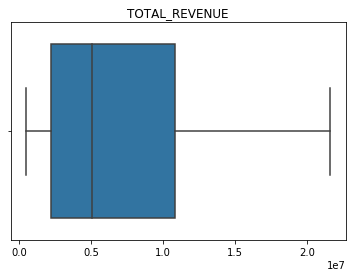

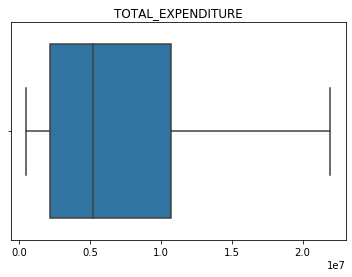

In [12]:
# Use winsorize to weed out outliers
from scipy.stats.mstats import winsorize

winsorized_REVENUE = winsorize(useducation5_df["TOTAL_REVENUE"], (0, 0.10))

sns.boxplot(winsorized_REVENUE)
plt.title('TOTAL_REVENUE')
plt.show()

winsorized_EXPENDITURE = winsorize(useducation5_df["TOTAL_EXPENDITURE"], (0, 0.10))

sns.boxplot(winsorized_EXPENDITURE)
plt.title('TOTAL_EXPENDITURE')
plt.show()

##### No more outliers after we use winsorize to process the data

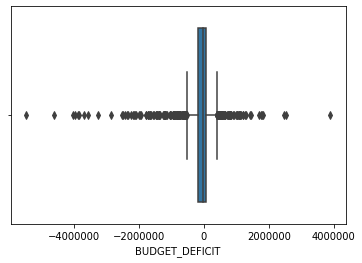

In [13]:
# New column budget_deficit = total_revenue-total_expenditure
useducation5_df['BUDGET_DEFICIT']=useducation5_df['TOTAL_REVENUE']-useducation5_df['TOTAL_EXPENDITURE']
sns.boxplot(useducation5_df['BUDGET_DEFICIT'])
plt.show()

##### The outliers in 'BUDGET_DEFICIT' are on both ends of the data.

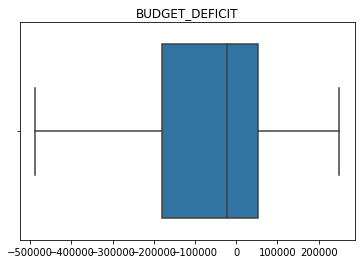

In [14]:
winsorized_BUDGET = winsorize(useducation5_df["BUDGET_DEFICIT"], (0.10, 0.10))

sns.boxplot(winsorized_BUDGET)
plt.title('BUDGET_DEFICIT')
plt.show()

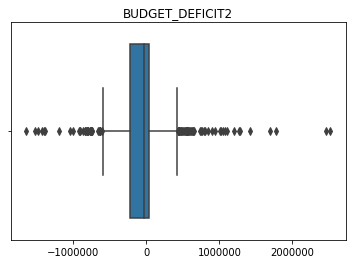

In [15]:
# Create Budget_decifit2 = winsorized_total_revenue-winsorized_total_expenditure
BUDGET_DEFICIT2 = winsorized_REVENUE - winsorized_EXPENDITURE
sns.boxplot(BUDGET_DEFICIT2)
plt.title('BUDGET_DEFICIT2')
plt.show()

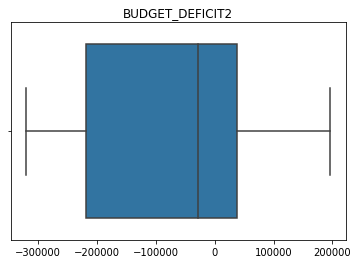

In [16]:
winsorized_BUDGET2 = winsorize(BUDGET_DEFICIT2, (0.10, 0.10))

sns.boxplot(winsorized_BUDGET2)
plt.title('BUDGET_DEFICIT2')
plt.show()

##### BUDGET_DEFICIT2 is created from winsorized_TOTAL_REVENUE - winsorized_TOTAL_EXPENDITURE

In [17]:
# Basic descriptive stats

df2=pd.concat([pd.DataFrame(winsorized_BUDGET, columns=['BUDGET']), pd.DataFrame(winsorized_BUDGET2, columns=['BUDGET2'])], axis=1)
df2.describe()

,BUDGET,BUDGET2
count,1275.000000,1275.000000
mean,-65154.252549,-66965.104314
std,211105.980071,169092.728179
min,-488457.000000,-320925.000000
25%,-181308.000000,-218426.000000
50%,-21368.000000,-28374.000000
75%,51627.000000,37054.000000
max,250060.000000,196243.000000


The two data sets have the same counts.  We can use t-test to see if they are different.

In [18]:
import scipy.stats as stats
stats.ttest_ind(winsorized_BUDGET, winsorized_BUDGET2)

Ttest_indResult(statistic=0.23905995149462264, pvalue=0.8110783216783962)

##### The t-test shows that there is no significant difference between BUDGET and BUDGET2. (p>0.1)  

Although there is no significant difference in BUDGET and BUDGET2, it is more desirable to create the variable from original data followed by winsorization.  Therefore, BUDGET is a better choice.  